# Kaggle Competition for House Prices: Handle test dataset

#

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#To veiw max columns
pd.pandas.set_option('display.max_columns',None)

In [3]:
#import test data

df_test =pd.read_csv('test.csv')

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df_test.shape

(1459, 80)

- there are 1459 raws
- there are 80 columns
- here last columns of train dataset has been dropped

#

<Axes: >

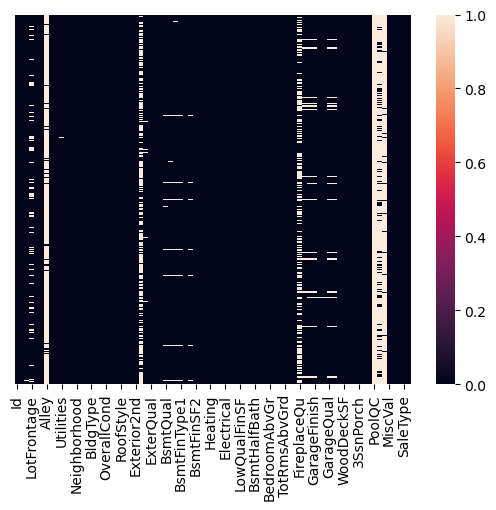

In [6]:
#plot null by using heatmap
sns.heatmap(df_test.isnull(),yticklabels=False )

In [7]:
#identify the categorical feature
cat_feature = [feature for feature in df_test.columns if df_test[feature].dtypes =='O']
print('length of categorical feature: ',len(cat_feature), '\n',cat_feature)

length of categorical feature:  43 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [8]:
#identify the numerical feature
num_feature =[feature for feature in df_test.columns if df_test[feature].dtypes !='O']
print('length of numerical feature: ',len(num_feature), '\n',num_feature)

length of numerical feature:  37 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


#

In [11]:
#find out null values in categorical feature
for feature in cat_feature:
    print('{}: {} missing value'.format(feature, df_test[feature].isnull().sum()))

MSZoning: 4 missing value
Street: 0 missing value
Alley: 1352 missing value
LotShape: 0 missing value
LandContour: 0 missing value
Utilities: 2 missing value
LotConfig: 0 missing value
LandSlope: 0 missing value
Neighborhood: 0 missing value
Condition1: 0 missing value
Condition2: 0 missing value
BldgType: 0 missing value
HouseStyle: 0 missing value
RoofStyle: 0 missing value
RoofMatl: 0 missing value
Exterior1st: 1 missing value
Exterior2nd: 1 missing value
MasVnrType: 894 missing value
ExterQual: 0 missing value
ExterCond: 0 missing value
Foundation: 0 missing value
BsmtQual: 44 missing value
BsmtCond: 45 missing value
BsmtExposure: 44 missing value
BsmtFinType1: 42 missing value
BsmtFinType2: 42 missing value
Heating: 0 missing value
HeatingQC: 0 missing value
CentralAir: 0 missing value
Electrical: 0 missing value
KitchenQual: 1 missing value
Functional: 2 missing value
FireplaceQu: 730 missing value
GarageType: 76 missing value
GarageFinish: 78 missing value
GarageQual: 78 missing

##### Below categorical features have null values need to be treate
- MSZoning: 4 missing value
- Utilities: 2 missing value
- Exterior1st: 1 missing value
- Exterior2nd: 1 missing value
- MasVnrType: 894 missing value
- BsmtQual: 44 missing value
- BsmtCond: 45 missing value
- BsmtExposure: 44 missing value
- BsmtFinType1: 42 missing value
- BsmtFinType2: 42 missing value
- KitchenQual: 1 missing value
- Functional: 2 missing value
- FireplaceQu: 730 missing value
- GarageType: 76 missing value
- GarageFinish: 78 missing value
- GarageQual: 78 missing value
- GarageCond: 78 missing value
- SaleType: 1 missing value




###### These features have huge amount of null values
- Alley: 1352 missing value
- PoolQC: 1456 missing value
- Fence: 1169 missing value
- MiscFeature: 1408 missing value

In [12]:
df_test[cat_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,NaN,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#

In [13]:
# Here we are going to treat for null values

columns_to_drop =['Alley', 'PoolQC', 'Fence', 'MiscFeature']
# since ['Alley', 'PoolQC', 'Fence', 'MiscFeature'] having huge number of 
# missing values, here we are going to drop those from dataset
 
df_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'] , axis=1, inplace=True)


In [14]:
# Update new categorical feature list
cat_feature_new =[feature for feature in cat_feature if feature not in columns_to_drop]

In [15]:
# Some of numerical features have less number of null values 
# Those null values will be replaced by Mode of particular feature
for feature in df_test[cat_feature_new]:
    #if feature not in large_null:
        df_test[feature]= df_test[feature].fillna(df_test[feature].mode()[0])
        
print(df_test[cat_feature_new].isnull().sum())

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [17]:
df_test.shape

(1459, 76)

In [18]:
df_test[cat_feature_new].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


#

In [19]:
#find out null values in numerical feature

for feature in num_feature:
    print('{}: {} missing value'.format(feature, df_test[feature].isnull().sum()))

Id: 0 missing value
MSSubClass: 0 missing value
LotFrontage: 227 missing value
LotArea: 0 missing value
OverallQual: 0 missing value
OverallCond: 0 missing value
YearBuilt: 0 missing value
YearRemodAdd: 0 missing value
MasVnrArea: 15 missing value
BsmtFinSF1: 1 missing value
BsmtFinSF2: 1 missing value
BsmtUnfSF: 1 missing value
TotalBsmtSF: 1 missing value
1stFlrSF: 0 missing value
2ndFlrSF: 0 missing value
LowQualFinSF: 0 missing value
GrLivArea: 0 missing value
BsmtFullBath: 2 missing value
BsmtHalfBath: 2 missing value
FullBath: 0 missing value
HalfBath: 0 missing value
BedroomAbvGr: 0 missing value
KitchenAbvGr: 0 missing value
TotRmsAbvGrd: 0 missing value
Fireplaces: 0 missing value
GarageYrBlt: 78 missing value
GarageCars: 1 missing value
GarageArea: 1 missing value
WoodDeckSF: 0 missing value
OpenPorchSF: 0 missing value
EnclosedPorch: 0 missing value
3SsnPorch: 0 missing value
ScreenPorch: 0 missing value
PoolArea: 0 missing value
MiscVal: 0 missing value
MoSold: 0 missing va

#### Below numerical features have null values
- LotFrontage: 227 missing value
- MasVnrArea: 15 missing value
- BsmtFinSF1: 1 missing value
- BsmtFinSF2: 1 missing value
- BsmtUnfSF: 1 missing value
- TotalBsmtSF: 1 missing value
- BsmtFullBath: 2 missing value
- BsmtHalfBath: 2 missing value
- GarageYrBlt: 78 missing value
- GarageCars: 1 missing value
- GarageArea: 1 missing value

In [20]:
df_test[num_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


In [22]:
#Sort out numerical null features
num_null_col =[feature for feature in df_test[num_feature] if df_test[feature].isnull().sum()>1] 
print(num_null_col)

# Observe mean and mode of the num_null_col
print(df_test['LotFrontage'].mean())
print(df_test['MasVnrArea'].mean())

df_test['LotFrontage'] =df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['MasVnrArea']  =df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

df_test['GarageArea']  =df_test['GarageArea'].fillna(df_test['GarageArea'].mode())
df_test['BsmtFinSF1']  =df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mode())
df_test['BsmtFinSF2']  =df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mode())
df_test['BsmtUnfSF']  =df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mode())
df_test['TotalBsmtSF']  =df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mode())
df_test['BsmtFullBath']  =df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode())
df_test['BsmtHalfBath']  =df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode())
df_test['GarageCars']  =df_test['GarageCars'].fillna(df_test['GarageCars'].mode())


#drop  df['GarageYrBlt'] 
df_test.drop(['GarageYrBlt'], axis=1, inplace=True)

['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']
68.58035714285714
100.70914127423822


In [24]:
# drop Id column
df_test.drop(['Id'],axis=1, inplace=True)

<Axes: >

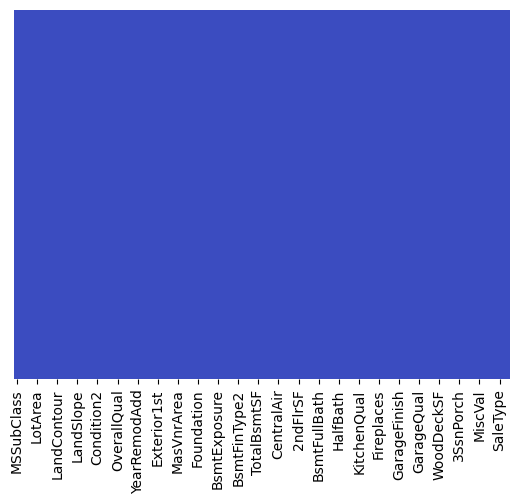

In [25]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

#

In [27]:
df_test.shape

(1459, 74)

In [29]:
df_test.to_csv('formulatedtest.csv',index=False)

# 